# Introduction

Looking at a companies ESG when making investment decisions is very beneficial to the investors because having a good record on ESG corresponds to a reduced investment risk. NYU Stern Center for Sustainable Business did an analysis of over 1,000 studies published since 2015 and showed that a strong management of ESG is linked to improved Return on Equity, Return on Assets, stock price and operational efficiency.

The specific issue that this project is going to address is the skepticism of some investors towards ESG integration. The analysis shown will provide evidence of the financial benefits of incorporating ESG metrics into investment strategies.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Collection

My python code for collecting this data has been turned in through Bright Space. Here I am importing my csv files to run analysis on the data.

In [18]:
esg_cont_data_path = 'https://hco21.github.io/data/esg_ratings_and_cont_level.csv'
balance_sheet_data_path = 'https://hco21.github.io/data/balance_sheet_final.csv'
historical_data_path = 'https://hco21.github.io/data/history_data_final.csv'
income_statements_data_path = 'https://hco21.github.io/data/income_statements_final.csv'

esg_cont_data = pd.read_csv(esg_cont_data_path)
balance_sheet_data = pd.read_csv(balance_sheet_data_path)
historical_data = pd.read_csv(historical_data_path)
income_statements_data = pd.read_csv(income_statements_data_path)

esg_cont_data = esg_cont_data.rename(columns ={'symbol':'Symbol'})

<ipython-input-18-dcae11bbac1a>:7: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144) have mixed types. Specify dtype option on import or set low_memory=False.
  balance_sheet_data = pd.read_csv(balance_sheet_data_path)


# Descriptive Statistics


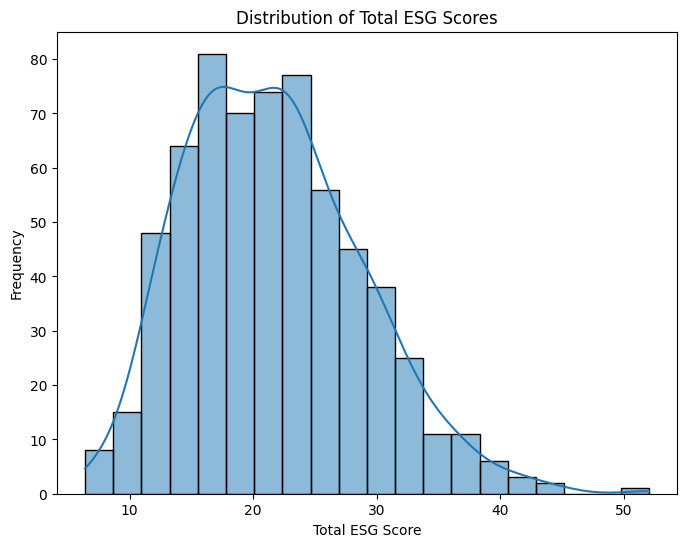

In [4]:
esg_cont_data.describe()

plt.figure(figsize = (8,6))
sns.histplot(data = esg_cont_data, x = 'total', bins = 20, kde = True)
plt.title('Distribution of Total ESG Scores')
plt.xlabel('Total ESG Score')
plt.ylabel('Frequency')
plt.show()

This graph shows that the distribution of Total ESG Scores are normally distributed across all companies.


count    197796.000000
mean        149.309518
std         329.718700
min           1.030000
25%          39.985984
50%          82.056901
75%         154.942161
max        8022.919922
Name: Open, dtype: float64


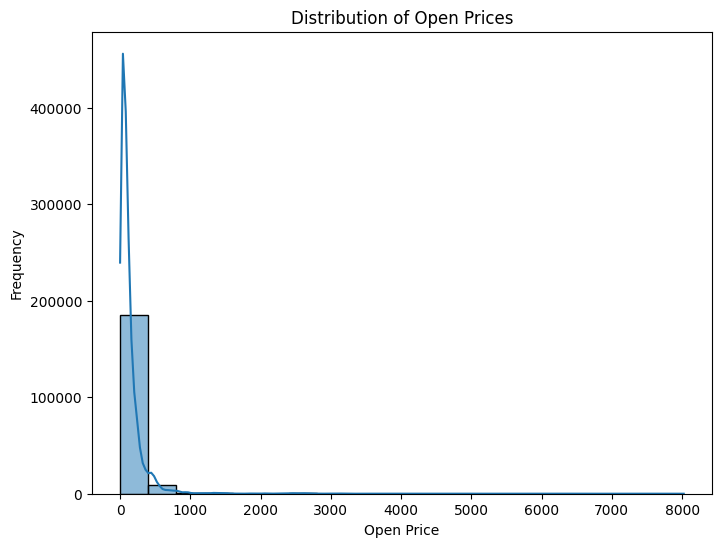

In [6]:
historical_stats = historical_data['Open'].describe()
print(historical_stats)

# Create distribution plot for 'open' column in historical data
plt.figure(figsize=(8, 6))
sns.histplot(data=historical_data, x='Open', bins=20, kde=True)
plt.title('Distribution of Open Prices')
plt.xlabel('Open Price')
plt.ylabel('Frequency')
plt.show()

It can be seen here that most of the companies have the same open price every day.

In [7]:
#esg_corr = esg_cont_data.corr()
#plt.figure(figsize=(8, 6))
#sns.heatmap(esg_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths = .5)
#plt.title('Correlation Heatmap for ESG Data')
#plt.show()

ValueError: could not convert string to float: 'A'

In [ ]:
#balance_sheet_corr = balance_sheet_data.corr()
#plt.figure(figsize=(10, 8))
#sns.heatmap(balance_sheet_corr, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Correlation Heatmap for Balance Sheet Data')
#plt.show()

As seen above, I wrote code to generate heat maps however they were only showing up blank.

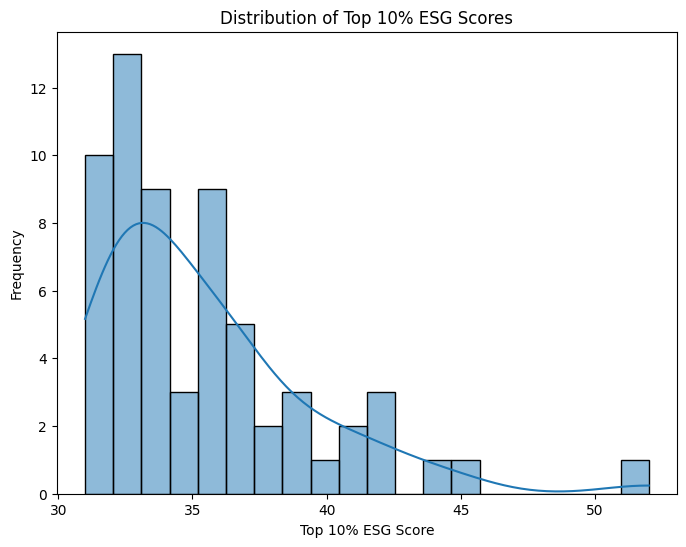

In [8]:
# retrieves a list of the companies in the top 10% total ESG scores
ninety_percentile = esg_cont_data['total'].quantile(.90)
top_ten_per_esg = esg_cont_data[esg_cont_data['total'] > ninety_percentile]
top_ten = pd.DataFrame(top_ten_per_esg)

plt.figure(figsize = (8,6))
sns.histplot(data = top_ten, x = 'total', bins = 20, kde = True)
plt.title('Distribution of Top 10% ESG Scores')
plt.xlabel('Top 10% ESG Score')
plt.ylabel('Frequency')
plt.show()

This graph shows the portion of the companies that are in the top 10% of ESG scores.

Text(0, 0.5, 'Frequency')

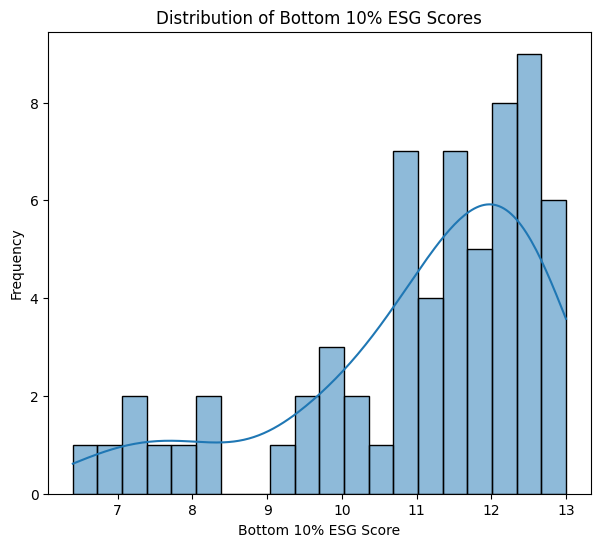

In [10]:
#retrieves a list of the companies in the lowest 10% total ESG scores
ten_percentile = esg_cont_data['total'].quantile(.10)
bot_ten_per_esg = esg_cont_data[esg_cont_data['total'] < ten_percentile]
bot_ten = pd.DataFrame(bot_ten_per_esg)

plt.figure(figsize = (7,6))
sns.histplot(data = bot_ten, x = 'total', bins = 20, kde = True)
plt.title('Distribution of Bottom 10% ESG Scores')
plt.xlabel('Bottom 10% ESG Score')
plt.ylabel('Frequency')

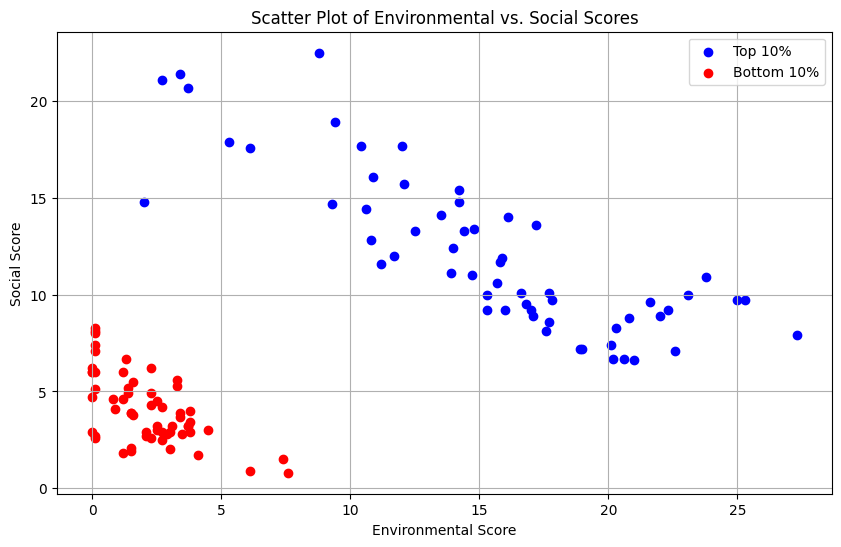

In [11]:
# Plot scatter plot for environmental (env) and social (soc) components

plt.figure(figsize=(10, 6))

plt.scatter(top_ten['env'], top_ten['soc'], color='blue', label='Top 10%')
plt.scatter(bot_ten['env'], bot_ten['soc'], color='red', label='Bottom 10%')


plt.xlabel('Environmental Score')
plt.ylabel('Social Score')
plt.title('Scatter Plot of Environmental vs. Social Scores')
plt.legend()
plt.grid(True)
plt.show()


Here it can be seen that the companies in the top 10% have both a higher Social and Environmental score than those companies in the bottom 10%.

In [13]:
top_ten.columns


Index(['Symbol', 'total', 'env', 'soc', 'gov', 'con'], dtype='object')

In [15]:
balance_sheet_data

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,<<<<<<< HEAD
NaN,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Working Capital,Net Tangible Assets,Capital Lease Obligations,Common Stock Equity,Total Capitalization,Total Equity Gross Minority Interest,Minority Interest,Stockholders Equity,Gains Losses Not Affecting Retained Earnings,Other Equity Adjustments,Retained Earnings,Additional Paid In Capital,Capital Stock,Common Stock,Total Liabilities Net Minority Interest,Total Non Current Liabilities Net Minority Interest,Other Non Current Liabilities,Derivative Product Liabilities,Employee Benefits,Non Current Pension And Other Postretirement Benefit Plans,Tradeand Other Payables Non Current,Non Current Deferred Liabilities,Non Current Deferred Revenue,Long Term Debt And Capital Lease Obligation,Long Term Capital Lease Obligation,Long Term Debt,Long Term Provisions,Current Liabilities,Other Current Liabilities,Current Debt And Capital Lease Obligation,Current Debt,Other Current Borrowings,Pensionand Other Post Retirement Benefit Plans Current,Payables And Accrued Expenses,Payables,Total Tax Payable,Accounts Payable,Total Assets,Total Non Current Assets,Other Non Current Assets,Defined Pension Benefit,Non Current Prepaid Assets,Non Current Deferred Assets,Non Current Deferred Taxes Assets,Non Current Accounts Receivable,Financial Assets,Investments And Advances,Goodwill And Other Intangible Assets,Other Intangible Assets,Goodwill,Net PPE,Accumulated Depreciation,Gross PPE,Construction In Progress,Other Properties,Machinery Furniture Equipment,Land And Improvements,Current Assets,Other Current Assets,Hedging Assets Current,Inventory,Other Inventories,Finished Goods,Work In Process,Raw Materials,Receivables,Other Receivables,Accounts Receivable,Cash Cash Equivalents And Short Term Investments,Cash And Cash Equivalents,Symbol,Company Name,Treasury Shares Number,Current Deferred Liabilities,Current Deferred Revenue,Current Capital Lease Obligation,Current Accrued Expenses,Restricted Cash,Other Short Term Investments,Cash Financial,Commercial Paper,Investmentin Financial Assets,Available For Sale Securities,Leases,Properties,Cash Equivalents,Treasury Stock,Non Current Deferred Taxes Liabilities,Dividends Payable,Buildings And Improvements,Preferred Stock,Other Payable,Income Tax Payable,Other Investments,Allowance For Doubtful Accounts Receivable,Gross Accounts Receivable,Preferred Shares Number,Preferred Stock Equity,Long Term Equity Investment,Investments In Other Ventures Under Equity Method,Prepaid Assets,Liabilities Heldfor Sale Non Current,Investmentsin Joint Venturesat Cost,Assets Held For Sale Current,Taxes Receivable,Other Equity Interest,Current Provisions,Interest Payable,Non Current Note Receivables,Financial Assets Designatedas Fair Value Through Profitor Loss Total,Investmentsin Associatesat Cost,Preferred Securities Outside Stock Equity,Line Of Credit,Current Notes Payable,Receivables Adjustments Allowances,Notes Receivable,Loans Receivable,Foreign Currency Translation Adjustments,Minimum Pension Liabilities,Unrealized Gain Loss,Held To Maturity Securities,Investment Properties,Duefrom Related Parties Current,Current Deferred Assets,Dueto Related Parties Current,Inventories Adjustments Allowances,Non Current Accrued Expenses,Accrued Interest Receivable,Trading Securities,Investmentsin Subsidiariesat Cost,Total Partnership Capital,Limited Partnership Capital,Dueto Related Parties Non Current,Duefrom Related Parties Non Current,Fixed Assets Revaluation Reserve,Current Deferred Taxes Liabilities,Current Deferred Taxes Assets,General Partnership Capital
2024-03-31,178472464.0,178472464.0,1190000000.0,2548000000.0,3812000000.0,6542000000.0,1840000000.0,3812000000.0,NaN,3994000000.0,6463000000.0,5534000000.0,1540000000.0,3994000000.0,-3628000000.0,-3628000000.0,-1564000000.0,9184000000.0

In [19]:
# creating new data frames of balance sheet data with only the top 10% and bottom
# 10% percent companies when looking at esg

top_ten_bs = pd.merge(top_ten, balance_sheet_data, on ='Symbol')
bottom_ten_bs = pd.merge(bot_ten, balance_sheet_data, on = 'Symbol')
# creating new data frames of income statements data with only the top 10% and bottom
# 10% percent companies when looking at esg
top_ten_is = pd.merge(top_ten, income_statements_data, on ='Symbol')
bottom_ten_is = pd.merge(bot_ten, income_statements_data, on ='Symbol')
# creating new data frames of historical data with only the top 10% and bottom
# 10% percent companies when looking at esg
top_ten_hist = pd.merge(top_ten, historical_data, on ='Symbol')
bottom_ten_hist = pd.merge(bot_ten, historical_data, on ='Symbol')

# Exploratory Data Analysis

I will now look to see if there is a correlation between a company having a high ESG score and also being more financially reliable.

In [22]:
top_ten_bs['Stockholders Equity']

0         23219000000
1         24132000000
2         25228000000
3         24939000000
4         24860000000
            ...      
575    205250000000.0
576    204802000000.0
577    199703000000.0
578    199046000000.0
579    198685000000.0
Name: Stockholders Equity, Length: 580, dtype: object

In [26]:
top_ten_bs.info()
top_ten_bs['total']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Columns: 150 entries, Symbol to General Partnership Capital
dtypes: float64(5), object(145)
memory usage: 679.8+ KB


0      31.8
1      31.8
2      31.8
3      31.8
4      31.8
       ... 
575    41.6
576    41.6
577    41.6
578    41.6
579    41.6
Name: total, Length: 580, dtype: float64

TypeError: 'value' must be an instance of str or bytes, not a float

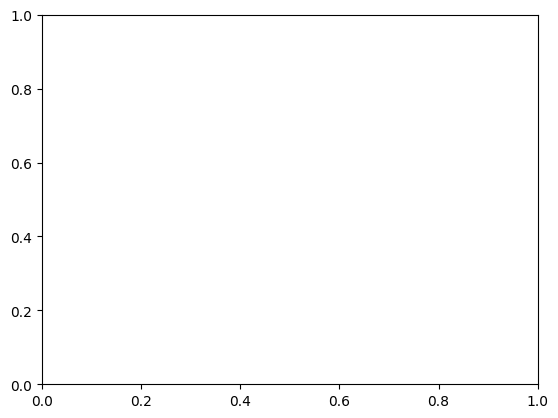

In [27]:
# Plot scatter plot for ESG score vs. Stockholders Equity

#sns.scatterplot(data = top_ten_bs, x = 'total', y ='Stockholders Equity')
#sns.scatterplot(data = bottom_ten_bs, x = 'total', y ='Stockholders Equity')



This scatter plot shows the relationship between ESG score and stockholders equity. Although many of the points are in the same range, the only companies that have both a high ESG score and high stockholders equity value are in the top 10% of companies. A higher stockholders equity indicates a company having more financial stability.


In [ ]:
#plt.figure(figsize=(10, 6))

#plt.scatter(top_ten_is['total'], top_ten_is['EBIT'], color='blue', label='Top 10%')
#plt.scatter(bottom_ten_is['total'], bottom_ten_is['EBIT'], color='red', label='Bottom 10%')

#plt.xlabel('Total ESG Score')
#plt.ylabel('Total Operating Income')
#plt.title('Scatter Plot of ESG Score vs. Operating Income')
#plt.legend()
#plt.grid(True)
#plt.show()

In this graph we can see that only companies in the top 10% ESG scores have high operating incomes. This indicates the companies ability to profit from it's operations and tells someone looking at the data that the company will have longevity.

# Significance of the Project

The data analysis done in this project can be applied to various real-world applications. For example someone looking to buy a house may use an analysis similar to this one to see the trends in the housing market, crime rate in different areas, housing price in different areas and so many more areas. Other areas where data analysis can be extremely beneifical is in athletics, say someone wanted to do really good in their fantasy football league, they could conduct a data analysis like this one to ensure they are picking the best people for their team.

Those are two very different examples of how one could use data analysis but it shows how versatile and useful it really can be.

# References

For this project I used:
-Class Notes
-ChatGPT
-various Websites (listed below)

My main use for ChatGPT was in learning how ESG and financial analysis are connected and some ways that I could show that using the data I had collected. I also used it to debug my code as I was writing it.

I also got help from a classmate to complete my data collection code.

Links:

https://concentricsolutions.com/images/os-resources/OS%20White%20Paper%20-%20Align%20ESG-Fin%20Reporting.pdf

https://www.wolterskluwer.com/en/expert-insights/the-importance-of-esg-as-a-key-drive-of-corporate-performance

https://www.sigmacomputing.com/resources/learn/data-analytics-applications
